In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

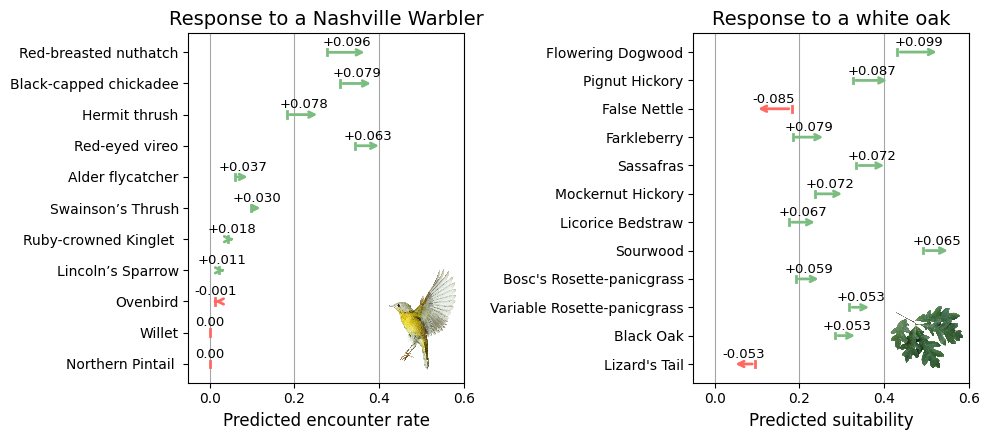

In [ ]:
green = "#7ABD7E"
red = "#FF6961"
palette = "RdYlGn"
cmap = plt.colormaps['RdYlGn']

fontsize_arrow_text = 9.5
linewidth = 2

df1 = pd.read_csv("plants_quercus_alba_response.csv")
df1["abs_change"] = df1["change"].abs()
df1 = df1.nlargest(12, "abs_change").sort_values(by="abs_change", ascending=True)
changes1 = list(df1["change"])
list_species1 = list(df1["species"])
uns_r1 = list(df1["unc_encounter_rate"])

species_common_names1 = {
    "Cornus florida": "Flowering Dogwood",
    "Carya glabra": "Pignut Hickory",
    "Boehmeria cylindrica": "False Nettle",
    "Vaccinium arboreum": "Farkleberry",
    "Sassafras albidum": "Sassafras",
    "Carya alba": "Mockernut Hickory",
    "Galium circaezans": "Licorice Bedstraw",
    "Oxydendrum arboreum": "Sourwood",
    "Panicum boscii": "Bosc's Rosette-panicgrass",
    "Panicum commutatum": "Variable Rosette-panicgrass",
    "Quercus velutina": "Black Oak",
    "Saururus cernuus": "Lizard's Tail"
}

list_species1 = [species_common_names1.get(species, species) for species in list_species1]

df2 = pd.read_csv("birds_nashville_warbler_response.csv")
df2["abs_change"] = df2["change"].abs()
df2 = df2.nlargest(12, "abs_change").sort_values(by="abs_change", ascending=True)
changes2 = list(df2["change"])
list_species2 = list(df2["species"])
uns_r2 = list(df2["unc_encounter_rate"])

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5), sharex=True)

def plot_response(ax, list_species, uns_r, changes, title, xlabel):
    for i, (_, change) in enumerate(zip(np.array(list_species), changes)):
        x_start = uns_r[i]
        x_end = uns_r[i] + change
        y = i
        
        color = cmap(((change / max(changes)) + 1) / 2)
        
        if change > 0:
            color = green
            ax.annotate('', xy=(x_end, i), xytext=(x_start, i), arrowprops=dict(arrowstyle='->', color=color, linewidth=linewidth))
            ax.plot([x_start, x_start], [i - 0.1, i + 0.1], color=color, linewidth=linewidth)
            midpoint = (change) / 2 + uns_r[i]
            ax.text(midpoint, i + 0.1, f"+{change:.3f}", ha='center', va='bottom', fontsize=fontsize_arrow_text)
        else:
            color = red
            if change < -0.0005:
                ax.annotate('', xy=(x_end, i), xytext=(x_start, i), arrowprops=dict(arrowstyle='->', color=color, linewidth=linewidth))
                ax.plot([x_start, x_start], [i - 0.1, i + 0.1], color=color, linewidth=linewidth)
                midpoint = (change) / 2 + uns_r[i]
                ax.text(midpoint, i + 0.1, f"{change:.3f}", ha='center', va='bottom', fontsize=fontsize_arrow_text)
            else:
                ax.plot([x_start, x_start], [i - 0.1, i + 0.1], color=color, linewidth=linewidth)
                ax.text(x_start, i + 0.1, "0.00", ha='center', va='bottom', fontsize=fontsize_arrow_text)
    
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_yticks(np.arange(len(list_species)))
    ax.set_yticklabels(list_species)
    ax.set_xlim(-0.05, 0.6)
    ax.grid(axis='x', color='gray', alpha=0.7)
    ax.set_title(title, fontsize=14)

plot_response(axes[1], list_species1, uns_r1, changes1, "Response to a white oak", "Predicted suitability")
plot_response(axes[0], list_species2, uns_r2, changes2, "Response to a Nashville Warbler", "Predicted encounter rate")

def add_species_image(ax, image_path, zoom, position):
    img = mpimg.imread(image_path)
    imagebox = OffsetImage(img, zoom=zoom, interpolation="nearest")
    ab = AnnotationBbox(imagebox, position, xycoords='axes fraction', frameon=False)
    ax.add_artist(ab)

add_species_image(axes[0], "nawa.png", zoom=0.04, position=(0.85, 0.18))
add_species_image(axes[1], "white_oak.png", zoom=0.120, position=(0.849, 0.13))

plt.tight_layout()
plt.savefig("response_comparison.pdf", bbox_inches='tight', dpi=500)
plt.show()